In [1]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt

In [2]:
pd.options.display.max_columns=999
pd.options.display.max_rows=100

In [3]:
h_miss = pd.read_csv('missing_table.csv')

In [4]:
h_miss

,variable,nmiss,perc
0,Post-op habituation,85,73.9
1,Pre-op habituation,83,72.2
2,Pre-op attention,60,52.2
3,Pre-op handling,51,44.3
4,Pre-op regulation,35,30.4
5,Pre-op quality of movement,34,29.6
6,Pre-op non-optimal reflexes,34,29.6
7,Pre-op stress,34,29.6
8,Pre-op arousal,34,29.6
9,Pre-op hypertonic,34,29.6


In [3]:
data_fp = '/Users/u1001626/Documents/PhD/Statistical Practice/Projects/Project2/phs7050_neoNateCHD'

In [4]:
data = pd.read_csv(os.path.join(data_fp,'NNNS_score_data.csv'))

In [5]:
data.head(2)

,sex..1.M..2.F.,Age.at.Surgery..days.,Premature,Genetic.Syndrome.or.Chromosomal.Abnormality,Cardiac.Anatomy,GI.Complication,Length.of.Stay..days.,Length.of.intubation..days.,Extubation.failure,bypass.used.,bypass.time..min.,Intubated.Pre.operatively,Neurologic.Complication,Pre.Op.NNNS.habituation.score,Pre.Op.NNNS.attention.score,Pre.Op.NNNS.handling.score,Pre.Op.NNNS.Quality.of.Movement.Score,Pre.Op.NNNS.Regulation.Score,Pre.Op.NNNS.Non.Optimal.Reflexes.Score,Pre.Op.NNNS.Stress.Score,Pre.Op.NNNS.Arousal.Score,Pre.Op.NNNS.Hypertonic.Score,Pre.Op.NNNS.Hypotonic.Score,Pre.Op.NNNS.Asymmetry.Score,Pre.Op.NNNS.Excitability.Score,Pre.Op.NNNS.Lethargy.Score,Percent.of.feeds.taken.by.mouth.at.discharge,Date.PO.feeds.started,Date.Reaching.Full.PO,Date.Identified.as.not.yet.full.PO,Post.Op.NNNS.habituation.score,Post.Op.NNNS.attention.score,Post.Op.NNNS.handling.score,Post.Op.NNNS.Quality.of.Movement.Score,Post.Op.NNNS.Regulation.Score,Post.Op.NNNS.Non.Optimal.Reflexes.Score,Post.Op.NNNS.Stress.Score,Post.Op.NNNS.Arousal.Score,Post.Op.NNNS.Hypertonic.Score,Post.Op.NNNS.Hypotonic.Score,Post.Op.NNNS.Asymmetry.Score,Post.Op.NNNS.Excitability.Score,Post.Op.NNNS.Lethargy.Score,AirwayAnomalyYN
0,2,9,1,0,3,0,23,1.3,N,1,34,Y,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,8/27/2015,8/28/2015,NaN,NaN,4.000000,0.500,4.666667,5.4,2.0,0.040816,4.000000,1.0,0.0,1.0,2.0,5.0,0
1,1,8,1,0,3,0,46,5.8,Y,1,174,N,0,NaN,3.566833,0.25,4.166667,5.076923,3.0,0.061224,3.142857,0.0,0.0,0.0,2.0,7.0,0.19,10/6/2015,11/23/2015,NaN,9.0,4.428571,0.375,5.000000,5.0,0.0,0.000000,3.428571,0.0,0.0,1.0,3.0,4.0,0


In [6]:
df = data.loc[(data['AirwayAnomalyYN']==0)&(data['Neurologic.Complication']==0)].copy() # exclusion criteria

In [15]:
df.fillna(-1).to_csv('exclusion_data.csv',index=False)

In [7]:
cnts = []
pers = []
for c in df.columns.tolist():
    ln = len(df[(df[c].isna()==True)])
    cnts.append(ln)
    pers.append(np.round(ln/len(data),2))

miss = pd.DataFrame()
miss['covariate'] = df.columns.tolist()
miss['cnt'] = cnts
miss['percent'] = pers

In [8]:
miss.sort_values(by='percent',ascending=False).reset_index().drop('index',axis=1)

,covariate,cnt,percent
0,Date.Identified.as.not.yet.full.PO,92,0.71
1,Post.Op.NNNS.habituation.score,85,0.66
2,Pre.Op.NNNS.habituation.score,83,0.64
3,Pre.Op.NNNS.attention.score,60,0.47
4,Pre.Op.NNNS.handling.score,51,0.40
5,Pre.Op.NNNS.Regulation.Score,35,0.27
6,Pre.Op.NNNS.Quality.of.Movement.Score,34,0.26
7,Pre.Op.NNNS.Lethargy.Score,34,0.26
8,Pre.Op.NNNS.Excitability.Score,34,0.26
9,Pre.Op.NNNS.Asymmetry.Score,34,0.26


In [9]:
cols = ['Pre_Op_NNNS_attention_score','Post_Op_NNNS_attention_score','Female',
        'Genetic_Syndrome_or_Chromosomal_Abnormality','Age_at_Surgery_days','Cardiac_Anatomy',
        'Length_of_intubation_days+Length_of_Stay_days','Extubation_failure','GI_Complication','Premature']

In [10]:
miss[(miss.covariate.isin(cols))]

,covariate,cnt,percent
2,Premature,0,0.0


# Exclusion Criteria
- Neurologic or airway anomaly!

# Analysis I
1. Are lower pre- or post-op attention scores associated with lower % oral feeds at discharge? <br>
Outcome variable: % oral feed (Percent.of.feeds.taken.by.mouth.at.discharge)
Primary Covariates: pre and post operation attention scores<br>
- Female (sex..1.M..2.F.)
- Genetic syndrome (Genetic.Syndrome.or.Chromosomal.Abnormality)
- Age at surgery (d) (Age.at.Surgery..days.)
- Single ventricle with arch obstruction (AirwayAnomalyYN)
- Single ventricle without arch obstruction
- Two ventricles with arch obstruction
- Two ventricles without arch obstruction NNNS attention score
- Ventilator d (Intubated.Pre.operatively)
- Length of stay (d) (Length.of.Stay..days.)
- Extubation failure (Extubation.failure)
- Gastrointestinal complication (GI.Complication)
- Neurologic Complication (Neurologic.Complication)
- Premature (Premature)
- Preoperative oral feeds
- pre op attention score (Pre.Op.NNNS.attention.score)
- post op attention score (Post.Op.NNNS.attention.score)

In [11]:
post_cols = [c for c in data.columns.tolist() if 'ost' in c]
pre_cols = [c for c in data.columns.tolist() if 'Pre' in c]

In [12]:
def calc_corr(df,col1,col2):
    c1 = df[col1]
    c2 = df[col2]
    corr = c1.corr(c2)
    return corr

def plot_scatter(df,col1,col2):
    print(f'Correlation = {calc_corr(df,col1,col2)}')
    plt.scatter(df[col1],df[col2])
    plt.xlabel(f'{col1}')
    plt.ylabel(f'{col2}')
    plt.title(f'Correlation between {col1} and {col2}')
    plt.show()

Correlation = -0.6458162086971551


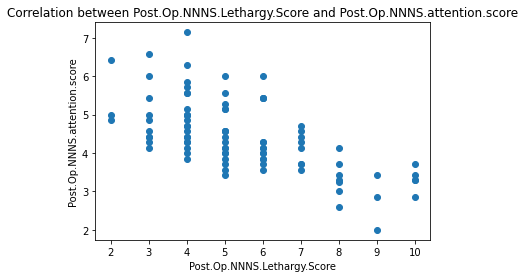

In [13]:
post_attn = 'Post.Op.NNNS.attention.score'
other_col = 'Post.Op.NNNS.Lethargy.Score'
plot_scatter(data,other_col,post_attn)

In [14]:
post_attn = 'Post.Op.NNNS.attention.score'
corrs = []
for c in post_cols:
    cor = calc_corr(df,post_attn,c)
    corrs.append(cor)
    
post_cor = pd.DataFrame()
post_cor['covariate'] = post_cols
post_cor['correlation'] = corrs
post_cor = pd.merge(post_cor,miss,on='covariate',how='left')
post_cor.sort_values(by='correlation',ascending=False,inplace=True)

In [15]:
post_cor

,covariate,correlation,cnt,percent
1,Post.Op.NNNS.attention.score,1.000000,33,0.26
10,Post.Op.NNNS.Asymmetry.Score,0.175471,24,0.19
7,Post.Op.NNNS.Arousal.Score,0.171538,24,0.19
3,Post.Op.NNNS.Quality.of.Movement.Score,0.088740,24,0.19
11,Post.Op.NNNS.Excitability.Score,0.063137,24,0.19
5,Post.Op.NNNS.Non.Optimal.Reflexes.Score,0.063105,24,0.19
6,Post.Op.NNNS.Stress.Score,0.013864,24,0.19
8,Post.Op.NNNS.Hypertonic.Score,-0.000706,24,0.19
4,Post.Op.NNNS.Regulation.Score,-0.012121,24,0.19
9,Post.Op.NNNS.Hypotonic.Score,-0.081265,24,0.19


In [16]:
pre_attn = 'Pre.Op.NNNS.attention.score'
corrs = []
cols = []
for c in pre_cols:
    try:
        cor = calc_corr(df,pre_attn,c)
        cols.append(c)
        corrs.append(cor)
    except:
        print(f'Error raised for {c}')
    
pre_cor = pd.DataFrame()
pre_cor['covariate'] = cols
pre_cor['correlation'] = corrs
pre_cor = pd.merge(pre_cor,miss,on='covariate',how='left')
pre_cor.sort_values(by='correlation',ascending=False,inplace=True)

Error raised for Intubated.Pre.operatively


In [17]:
pre_cor

,covariate,correlation,cnt,percent
2,Pre.Op.NNNS.attention.score,1.000000,60,0.47
3,Pre.Op.NNNS.handling.score,0.146009,51,0.40
5,Pre.Op.NNNS.Regulation.Score,0.134447,35,0.27
9,Pre.Op.NNNS.Hypertonic.Score,0.091356,34,0.26
12,Pre.Op.NNNS.Excitability.Score,0.037000,34,0.26
11,Pre.Op.NNNS.Asymmetry.Score,0.000206,34,0.26
8,Pre.Op.NNNS.Arousal.Score,-0.117315,34,0.26
4,Pre.Op.NNNS.Quality.of.Movement.Score,-0.139268,34,0.26
7,Pre.Op.NNNS.Stress.Score,-0.157142,34,0.26
10,Pre.Op.NNNS.Hypotonic.Score,-0.316775,34,0.26


## Non-converging Covariate

In [18]:
data.head(2)

,sex..1.M..2.F.,Age.at.Surgery..days.,Premature,Genetic.Syndrome.or.Chromosomal.Abnormality,Cardiac.Anatomy,GI.Complication,Length.of.Stay..days.,Length.of.intubation..days.,Extubation.failure,bypass.used.,bypass.time..min.,Intubated.Pre.operatively,Neurologic.Complication,Pre.Op.NNNS.habituation.score,Pre.Op.NNNS.attention.score,Pre.Op.NNNS.handling.score,Pre.Op.NNNS.Quality.of.Movement.Score,Pre.Op.NNNS.Regulation.Score,Pre.Op.NNNS.Non.Optimal.Reflexes.Score,Pre.Op.NNNS.Stress.Score,Pre.Op.NNNS.Arousal.Score,Pre.Op.NNNS.Hypertonic.Score,Pre.Op.NNNS.Hypotonic.Score,Pre.Op.NNNS.Asymmetry.Score,Pre.Op.NNNS.Excitability.Score,Pre.Op.NNNS.Lethargy.Score,Percent.of.feeds.taken.by.mouth.at.discharge,Date.PO.feeds.started,Date.Reaching.Full.PO,Date.Identified.as.not.yet.full.PO,Post.Op.NNNS.habituation.score,Post.Op.NNNS.attention.score,Post.Op.NNNS.handling.score,Post.Op.NNNS.Quality.of.Movement.Score,Post.Op.NNNS.Regulation.Score,Post.Op.NNNS.Non.Optimal.Reflexes.Score,Post.Op.NNNS.Stress.Score,Post.Op.NNNS.Arousal.Score,Post.Op.NNNS.Hypertonic.Score,Post.Op.NNNS.Hypotonic.Score,Post.Op.NNNS.Asymmetry.Score,Post.Op.NNNS.Excitability.Score,Post.Op.NNNS.Lethargy.Score,AirwayAnomalyYN
0,2,9,1,0,3,0,23,1.3,N,1,34,Y,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,8/27/2015,8/28/2015,NaN,NaN,4.000000,0.500,4.666667,5.4,2.0,0.040816,4.000000,1.0,0.0,1.0,2.0,5.0,0
1,1,8,1,0,3,0,46,5.8,Y,1,174,N,0,NaN,3.566833,0.25,4.166667,5.076923,3.0,0.061224,3.142857,0.0,0.0,0.0,2.0,7.0,0.19,10/6/2015,11/23/2015,NaN,9.0,4.428571,0.375,5.000000,5.0,0.0,0.000000,3.428571,0.0,0.0,1.0,3.0,4.0,0


In [19]:
set(data['Genetic.Syndrome.or.Chromosomal.Abnormality'])

{0, 1}

In [21]:
gen_cnt = data.groupby(['Genetic.Syndrome.or.Chromosomal.Abnormality']).Premature.count().reset_index(name='cat_cnt')
gen_cnt['percent'] = gen_cnt.cat_cnt / len(data)
gen_cnt

,Genetic.Syndrome.or.Chromosomal.Abnormality,cat_cnt,percent
0,0,105,0.813953
1,1,24,0.186047
